In [143]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import math
import numbers
import time

2.0.0-alpha0


In [60]:
def make_circles(grid = 10, n_data = 10):    
    max_distance = int(grid/2)-1
    radii = np.random.randint(max_distance/4,max_distance,size = (n_data, 2))
    distances = np.array([np.random.randint(max_distance) for i in range(n_data)])
    circles = np.zeros((n_data, grid, grid))
    for j in range(distances.size):
        for k in range(2):
            r = radii[j][k]
            for l in range(grid):
                for m in range(grid):
                    if k == 0:
                        x = l - max_distance + distances[j]/2
                    else:
                        x = l - max_distance - distances[j]/2
                    y = m - max_distance
                    position = math.sqrt(x**2 + y**2)
                    if position <= r:
                        p = np.exp((-1./2.)*(3.*position/r)**2.)
                        circles[j][l][m] += p
    circles = circles.reshape(n_data,grid**2)
    distances = distances.reshape(n_data,1)
    return circles, radii, distances
    

Make data

In [87]:
grid = 100
n_data = 500
toc = time.clock()
circleData, radiiLabels, distanceLabels = make_circles(grid, n_data)
tic = time.clock()
print(tic-toc)

[[31]
 [31]
 [48]
 [19]
 [41]
 [16]
 [46]
 [10]
 [20]
 [ 4]
 [ 0]
 [43]
 [45]
 [14]
 [15]
 [33]
 [10]
 [13]
 [10]
 [ 4]
 [41]
 [43]
 [ 6]
 [42]
 [ 0]
 [ 6]
 [30]
 [14]
 [ 5]
 [13]
 [12]
 [ 2]
 [32]
 [23]
 [37]
 [29]
 [26]
 [11]
 [23]
 [32]
 [ 2]
 [29]
 [ 8]
 [29]
 [22]
 [ 5]
 [46]
 [29]
 [36]
 [18]
 [20]
 [43]
 [19]
 [19]
 [28]
 [20]
 [38]
 [30]
 [40]
 [ 7]
 [39]
 [33]
 [23]
 [14]
 [20]
 [17]
 [ 7]
 [25]
 [16]
 [ 1]
 [26]
 [37]
 [26]
 [12]
 [13]
 [39]
 [47]
 [45]
 [ 9]
 [ 1]
 [ 0]
 [20]
 [12]
 [33]
 [45]
 [23]
 [10]
 [11]
 [28]
 [46]
 [17]
 [26]
 [10]
 [29]
 [34]
 [15]
 [ 1]
 [ 6]
 [ 9]
 [ 9]
 [30]
 [ 4]
 [25]
 [32]
 [ 5]
 [29]
 [45]
 [39]
 [16]
 [ 4]
 [14]
 [19]
 [37]
 [35]
 [11]
 [36]
 [ 2]
 [ 4]
 [ 0]
 [18]
 [15]
 [32]
 [22]
 [ 2]
 [16]
 [44]
 [22]
 [18]
 [26]
 [14]
 [10]
 [33]
 [32]
 [ 9]
 [35]
 [ 0]
 [46]
 [22]
 [35]
 [ 7]
 [40]
 [26]
 [ 2]
 [ 6]
 [23]
 [37]
 [10]
 [ 3]
 [14]
 [ 9]
 [30]
 [ 1]
 [ 3]
 [ 6]
 [33]
 [12]
 [47]
 [ 0]
 [ 6]
 [40]
 [47]
 [ 1]
 [ 7]
 [39]
 [34]
 [11]
 [10

Print a plot of data to see what it looks like!

radius = 
[15 12]
distance between centers = 
[29]


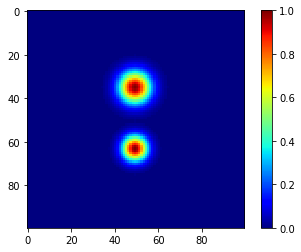

In [88]:
display = circleData[35].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print("radius = ")
print(radiiLabels[35])
print("distance between centers = ")
print(distanceLabels[35])
plt.colorbar()

Preprocessing -> spit data into training and testing; take 80% for training and 20% for testing

In [103]:
distanceData = circleData.reshape(n_data, grid, grid, 1)
split = int(0.8*len(circleData))
train_data = distanceData[:split]
train_labels = distanceLabels[:split]
print (train_data.shape)
test_data = distanceData[split:]
print(test_data.shape)
test_labels = distanceLabels[split:]

(400, 100, 100, 1)
(100, 100, 100, 1)


Build DNN with 2 hidden layers

In [169]:
def build_model():
  model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation=tf.nn.relu), 
    layers.Dense(1)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_squared_error', 'mean_absolute_error'])
  return model

Initialize model:

In [162]:
model_circ = build_model()

Test model's prediction $before$ training:

In [163]:
example_batch = train_data[:10]
example_labels = train_labels[:10]
example_result = model_circ.predict(example_batch)
results = model_circ.evaluate(example_batch, example_labels)
example_result

10/10 [==============================] - 0s 6ms/sample - loss: 914.1093 - mean_squared_error: 914.1093 - mean_absolute_error: 26.5782


array([[ 0.01256341],
       [ 0.028612  ],
       [ 0.04188075],
       [ 0.00467889],
       [ 0.06092082],
       [-0.02824245],
       [ 0.01457629],
       [ 0.00880338],
       [ 0.06131666],
       [ 0.01329632]], dtype=float32)

In [164]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('')
    print('.', end='')
    
EPOCHS = 100

history = model_circ.fit(
  train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[PrintDot()])

Train on 320 samples, validate on 80 samples
Epoch 1/100
320/320 [==============================] - 1s 4ms/sample - loss: 257.7573 - mean_squared_error: 257.7573 - mean_absolute_error: 12.4217 - val_loss: 66.1627 - val_mean_squared_error: 66.1627 - val_mean_absolute_error: 6.4306
Epoch 2/100
320/320 [==============================] - 1s 4ms/sample - loss: 46.1461 - mean_squared_error: 46.1461 - mean_absolute_error: 5.2821 - val_loss: 20.7550 - val_mean_squared_error: 20.7550 - val_mean_absolute_error: 3.8841
Epoch 3/100
320/320 [==============================] - 2s 5ms/sample - loss: 16.7141 - mean_squared_error: 16.7141 - mean_absolute_error: 3.4778 - val_loss: 16.6304 - val_mean_squared_error: 16.6304 - val_mean_absolute_error: 3.1351
Epoch 4/100
320/320 [==============================] - 2s 5ms/sample - loss: 9.6974 - mean_squared_error: 9.6974 - mean_absolute_error: 2.3728 - val_loss: 10.4923 - val_mean_squared_error: 10.4923 - val_mean_absolute_error: 2.6232
Epoch 5/100
320/320 [=

Epoch 36/100
320/320 [==============================] - 1s 4ms/sample - loss: 1.8224 - mean_squared_error: 1.8224 - mean_absolute_error: 1.0418 - val_loss: 2.6878 - val_mean_squared_error: 2.6878 - val_mean_absolute_error: 1.2507
Epoch 37/100
320/320 [==============================] - 1s 4ms/sample - loss: 2.0004 - mean_squared_error: 2.0004 - mean_absolute_error: 1.0626 - val_loss: 2.8901 - val_mean_squared_error: 2.8901 - val_mean_absolute_error: 1.3530
Epoch 38/100
320/320 [==============================] - 1s 4ms/sample - loss: 2.5594 - mean_squared_error: 2.5594 - mean_absolute_error: 1.2434 - val_loss: 3.5645 - val_mean_squared_error: 3.5645 - val_mean_absolute_error: 1.4875
Epoch 39/100
320/320 [==============================] - 1s 4ms/sample - loss: 2.0772 - mean_squared_error: 2.0772 - mean_absolute_error: 1.1075 - val_loss: 2.9634 - val_mean_squared_error: 2.9634 - val_mean_absolute_error: 1.2239
Epoch 40/100
320/320 [==============================] - 1s 4ms/sample - loss: 2.

Epoch 72/100
320/320 [==============================] - 1s 4ms/sample - loss: 1.1426 - mean_squared_error: 1.1426 - mean_absolute_error: 0.8163 - val_loss: 1.8289 - val_mean_squared_error: 1.8289 - val_mean_absolute_error: 0.9554
Epoch 73/100
320/320 [==============================] - 2s 5ms/sample - loss: 0.9976 - mean_squared_error: 0.9976 - mean_absolute_error: 0.7469 - val_loss: 1.7957 - val_mean_squared_error: 1.7957 - val_mean_absolute_error: 1.0488
Epoch 74/100
320/320 [==============================] - 1s 4ms/sample - loss: 1.0331 - mean_squared_error: 1.0331 - mean_absolute_error: 0.7989 - val_loss: 1.5081 - val_mean_squared_error: 1.5081 - val_mean_absolute_error: 0.9364
Epoch 75/100
320/320 [==============================] - 2s 5ms/sample - loss: 0.9393 - mean_squared_error: 0.9393 - mean_absolute_error: 0.7248 - val_loss: 1.4559 - val_mean_squared_error: 1.4559 - val_mean_absolute_error: 0.9039
Epoch 76/100
320/320 [==============================] - 2s 5ms/sample - loss: 1.

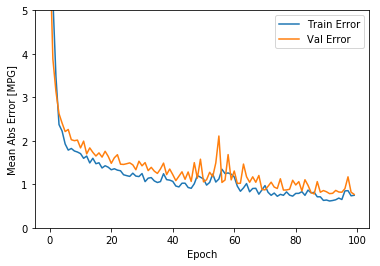

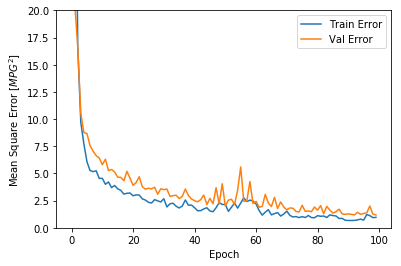

In [165]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


....................................................................................................

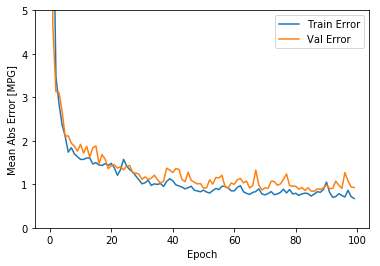

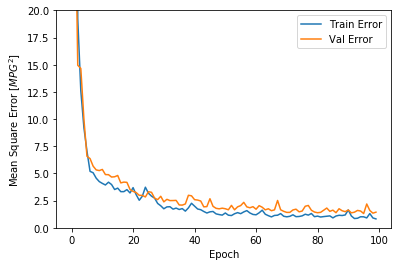

In [171]:
model_circ = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history_earlyStop = model_circ.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history_earlyStop)

In [167]:
results = model_circ.evaluate(test_data, test_labels)

100/100 [==============================] - 0s 1ms/sample - loss: 1.9452 - mean_squared_error: 1.9452 - mean_absolute_error: 1.1204


100/100 [==============================] - 0s 987us/sample - loss: 1.9452 - mean_squared_error: 1.9452 - mean_absolute_error: 1.1204


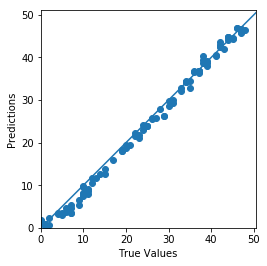

In [168]:
test_predictions = model_circ.predict(test_data)
results = model_circ.evaluate(test_data, test_labels)
plt.scatter(test_labels.flatten(), test_predictions.flatten())
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Now let's use the same network to predict radii!

In [196]:
split = int(0.8*len(circleData))
train_data_rad = circleData[:split]
train_labels_rad = radiiLabels[:split]
test_data_rad = circleData[split:]
test_labels_rad = radiiLabels[split:]

In [197]:
def build_model_rad():
  model = keras.Sequential([
    layers.Dense(64,activation = tf.nn.relu),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(2)
  ])

  model.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [198]:
model_rad = build_model_rad()
example_batch = train_data_rad[:10]
example_result = model_rad.predict(example_batch)
example_result

array([[-0.42544043, -0.03183147],
       [-0.4541311 ,  0.0639946 ],
       [-0.32180512, -0.08969742],
       [-0.2283129 , -0.05451678],
       [-0.17636159, -0.02044204],
       [-0.45131576,  0.08878118],
       [-0.35811767, -0.03819159],
       [-0.42292   ,  0.16209707],
       [-0.26984227,  0.01676321],
       [-0.09146459,  0.00532117]], dtype=float32)


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

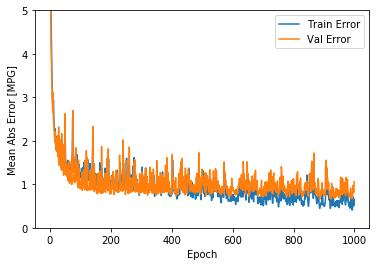

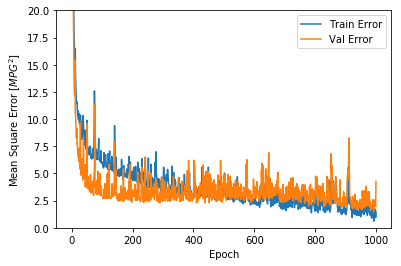

In [199]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: 
        print('')
    print('.', end='')
    
EPOCHS = 1000

history = model_rad.fit(
  train_data_rad, train_labels_rad,
  epochs=EPOCHS, validation_split = 0.2, verbose = 0,
  callbacks=[PrintDot()])

plot_history(history)


....................................................................................................
............................

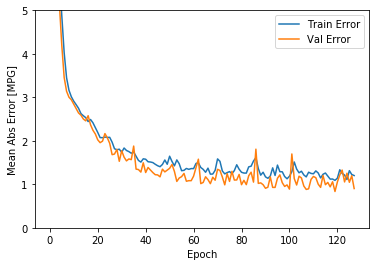

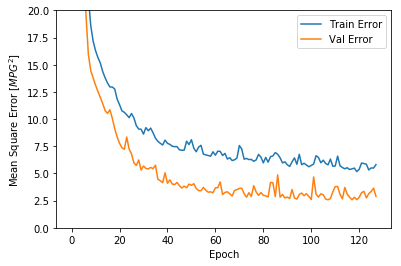

In [203]:
model = build_model_rad()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data_rad, train_labels_rad, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [204]:
results = model.evaluate(test_data_rad, test_labels_rad)
print(results)


100/100 [==============================] - 0s 85us/sample - loss: 4.2004 - mean_absolute_error: 0.9536 - mean_squared_error: 4.2004
[4.200433611869812, 0.9535692, 4.2004337]


95.11404739804883


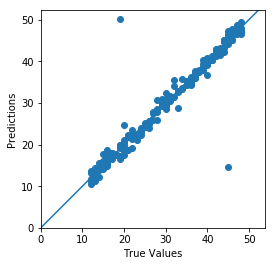

In [205]:
test_predictions_rad = model_rad.predict(test_data_rad).flatten()
ratio = 100-(abs(test_labels_rad.flatten() - test_predictions_rad)*100/test_predictions_rad)
print(np.average(ratio))
plt.scatter(test_labels_rad, test_predictions_rad)

plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])